<div style="font-size: 20px;">
#Python Data Visualization and GUI Setup

In this Python script, we are using various libraries to perform data visualization and set up a Graphical User Interface (GUI) using Tkinter.

This part imports required Libraries.

In [29]:
import pandas as pd
import os
import csv
import random
import matplotlib.pyplot as plt
import tkinter as tk
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Radiobutton, StringVar

This part defines various variables and data structures to manage data related to gesture location mapping for the data visualization.

In [30]:
base_folderPath = 'D:/MyPythonProjects/DataVisualizationFinalProject/DataVisualizationProject'
Merged_fileNmae = 'merged.csv'
color_map = {
    '1': 'red',
    '2': 'blue',
    '3': 'green',
    '4': 'black',
    'a': 'magenta',
    'b': 'yellow',
    'c': 'pink',
    'circleLeft': 'orange',
    'square': 'darkgreen',
    'triangle': 'purple'
}
participant_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
gesture_list = ['triangle', 'square', 'circleLeft', 'a', 'b', 'c', '1', '2', '3', '4']
output_fileName = 'merged.csv'
repetition_list = ['1', '2', '3', '4', '5']  

locations = ['Small bathroom', 'Bedroom closet', 'Kitchen closet', 'Kitchen', 'Bedroom 1', 'Bedroom 2', 'Deck',
             'Dining room', 'Big bathroom', 'Laundry']

# Dictionary to store the location for each participant-gesture combination
participant_gesture_locations = {}

This python function get_location(participant, gesture) is designed to retrieve or generate a location for a given participant-gesture combination.

In [31]:
def get_location(participant, gesture):
    # Check if the location for this participant-gesture combination has been generated before
    key = f"{participant}_{gesture}"
    
    if key not in participant_gesture_locations:
        # Generate a random location from the list of locations
        location = random.choice(locations)
        # Store the location for this participant-gesture combination in the dictionary
        participant_gesture_locations[key] = location
    else:
        # Retrieve the location for this participant-gesture combination from the dictionary
        location = participant_gesture_locations[key]

    return location

In [32]:
def create_plot(participant, gesture, repetition):

    global Read_data  # Declare Read_data as a global variable

    # Set plot_shown to False to prevent the initial plot from showing
    plot_shown = False

    # Create the folder path
    ParBaseFolder = base_folderPath + '/Datasets/Modifiedhand_gestures'
    Parfolder_path = f'{ParBaseFolder}/{participant}'

    # Get a list of all files in the folder
    file_list = os.listdir(Parfolder_path)

    # Loop through each file and read the data
    for file_name in file_list:
        file_path = os.path.join(Parfolder_path, file_name)
        file_name = os.path.basename(file_path)

        # Update the basename variable for each file
        basename = os.path.splitext(file_name)[0]
        new_filename = csv_filename = f"{basename}.csv"

        # Check if the file already exists in the directory
        if os.path.isfile(new_filename):
            # If the file already exists, add a number to the filename
            i = 1
            while os.path.isfile(f"{basename}_{i}.csv"):
                i += 1
                new_filename = f"{basename}_{i}.csv"

        # Open the input file in read mode
        with open(file_path, 'r') as input_file:
            # Create a CSV writer to write the output file
            first_letter = new_filename[0]
            with open(new_filename, 'w', newline='') as output_file:
                writer = csv.writer(output_file)

                # Read the input file line by line
                for line in input_file:
                    # Split the line into a list using the delimiter (',')
                    row = line.strip().split(',')

                    # Add the first letter of the file name to the added column
                    added_column1 = file_name.split('_')[0]
                    last_letter = file_name[-5]

                    # Append the added column to the row
                    row.append(str(added_column1))
                    row.append(last_letter)

                    # Write the row to the output file
                    writer.writerow(row)

        # Read the CSV file and give each column a name
        data = pd.read_csv(new_filename, header=None, names=['X', 'Y', 'Z', 'Type', 'Repetition'])
        data.to_csv(new_filename, index=False)

    # Get a list of all CSV files in the folder
    file_list = [os.path.join(base_folderPath, file) for file in os.listdir(base_folderPath) if file.endswith('.csv')]

    # Read each CSV file into a pandas DataFrame and concatenate them
    merged_data = pd.concat([pd.read_csv(file) for file in file_list])

    # Write the merged data to a new CSV file
    merged_data.to_csv(output_fileName, index=False)

    Read_data = pd.read_csv(output_fileName)
    os.remove(output_fileName)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Select only the rows with the current gesture and repetition
    type_data = Read_data.query(f"Type == '{gesture}' and Repetition == {repetition}")

    ax.scatter(type_data['X'], type_data['Y'], type_data['Z'], color=color_map[gesture], label=f"{gesture} (Repetition {repetition})")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Loop through all files in the folder
    for file_name in os.listdir(base_folderPath):
        if file_name.endswith('.csv'):  # Check if the file ends with '.csv'
            file_path2 = os.path.join(base_folderPath, file_name)  # Get the full file path
            os.remove(file_path2)  # Delete the file

    # Get the location for this participant-gesture combination
    location = get_location(participant, gesture)

    ax.text2D(0.05, 0.95, f"Location: {location}", transform=ax.transAxes, fontsize=14, fontname="Arial")

    return fig

In [33]:
def create_heatmap(participant, gesture, repetition, Read_data):
    # Check if 'Repetition' column exists in Read_data
    if 'Repetition' not in Read_data.columns:
        print("Error: 'Repetition' column not found in the data.")
        return

    # Filter the data for the selected participant, gesture, and repetition
    filtered_data = Read_data.query(f"Type == '{gesture}' and Repetition == {repetition}")

    # Check if the filtered_data is not empty
    if filtered_data.empty:
        print("No data available for the selected gesture and repetition.")
        return

    # Calculate the correlation matrix
    correlation_matrix = filtered_data[['X', 'Y', 'Z']].corr()

    # Check if the correlation_matrix contains NaN values
    if correlation_matrix.isnull().values.any():
        print("Correlation matrix contains NaN values. Cannot create the heatmap.")
        return

    plt.ioff()
    
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
    fig_heatmap = plt.figure()
    ax_heatmap = fig_heatmap.add_subplot(111)

    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, ax=ax_heatmap)
    ax_heatmap.set_title(f'Correlation Heatmap for Participant {participant} - Gesture {gesture} - Repetition {repetition}')

    return fig_heatmap

In [34]:
def update_plot():
    participant_selection = var1.get()
    gesture_selection = var2.get()
    repetition_selection = int(var3.get())  # Convert repetition to integer

    # Clear the previous plot
    for widget in window.winfo_children():
        if isinstance(widget, FigureCanvasTkAgg):
            widget.get_tk_widget().destroy()

    # Update the plot and set plot_shown to True
    fig = create_plot(participant_selection, gesture_selection, repetition_selection)

    # Create a canvas widget to display the plot
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().grid(row=1, column=0, columnspan=3, sticky="nsew")


In [35]:
def dropdown_changed(*args):
    # Check if the changed dropdown is the participant dropdown
    if args and args[0] == var1:
        return

    # For other dropdowns (gesture and repetition), update the selected values
    gesture_selection = var2.get()
    repetition_selection = var3.get()

    # Store the value of the radio button
    plot_type = var4.get()

In [36]:
def create_heatmap_button():
    global Read_data  # Declare Read_data as a global variable
    global plot_shown  # Declare plot_shown as a global variable

    participant_selection = var1.get()
    gesture_selection = var2.get()
    repetition_selection = int(var3.get())  # Convert repetition to integer

    # Update the Read_data variable with the latest data
    create_plot(participant_selection, gesture_selection, repetition_selection)

    # Check the value of the radio button
    plot_type = var4.get()
    if plot_type == "scatter":
        plot_shown = True  # Set plot_shown to True to display the scatter plot
        update_plot()
    elif plot_type == "heatmap":
        plot_shown = True  # Set plot_shown to True to display the heatmap plot

        # Get the canvas widget from the window and destroy it to remove the previous plot
        for widget in window.winfo_children():
            if isinstance(widget, FigureCanvasTkAgg):
                widget.get_tk_widget().destroy()

        # Create the heatmap plot
        fig_heatmap = create_heatmap(participant_selection, gesture_selection, repetition_selection, Read_data)

        # Embed the heatmap plot in the Tkinter window
        canvas_heatmap = FigureCanvasTkAgg(fig_heatmap, master=window)
        canvas_heatmap.draw()
        canvas_heatmap.get_tk_widget().grid(row=1, column=0, columnspan=3, sticky="nsew")



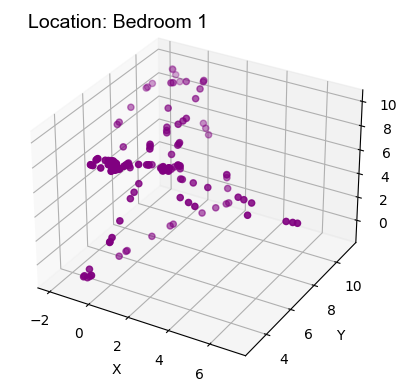

In [37]:
window = tk.Tk()
window.title("The visualization window")

# Create a custom font 
# Set a custom font for the entire application
custom_font = ("Arial", 12)
window.option_add("*Font", custom_font)

# Configure the grid to resize the canvas with the window
window.rowconfigure(1, weight=1)
window.columnconfigure(0, weight=1)

# Create a frame to hold the dropdowns
dropdown_frame = tk.Frame(window, bg="lightblue")
dropdown_frame.grid(row=0, column=0, columnspan=2)

# Create the dropdown menus
# Dropdown 1
var1 = tk.StringVar()
var1.set(participant_list[0])  # Set as default value

label1 = tk.Label(dropdown_frame, text="Participant number:", bg="lightblue")
label1.grid(row=0, column=0, sticky="E")
dropdown1 = tk.OptionMenu(dropdown_frame, var1, *participant_list, command=dropdown_changed)
dropdown1.config(highlightbackground="lightblue")
dropdown1.grid(row=0, column=1, sticky="W")

# Dropdown 2
var2 = tk.StringVar()
var2.set(gesture_list[0])  # default value

label2 = tk.Label(dropdown_frame, text="Gesture type:", bg="lightblue")
label2.grid(row=1, column=0, sticky="E")
dropdown2 = tk.OptionMenu(dropdown_frame, var2, *gesture_list, command=dropdown_changed)
dropdown2.config(highlightbackground="lightblue")
dropdown2.grid(row=1, column=1, sticky="W")

# Dropdown 3
var3 = tk.StringVar()
var3.set(repetition_list[0])  # default value

label3 = tk.Label(dropdown_frame, text="Repetition:", bg="lightblue")
label3.grid(row=2, column=0, sticky="E")
dropdown3 = tk.OptionMenu(dropdown_frame, var3, *repetition_list, command=dropdown_changed)
dropdown3.config(highlightbackground="lightblue")
dropdown3.grid(row=2, column=1, sticky="W")

# Create the radio buttons
var4 = StringVar()
var4.set("scatter")  # Set the default value to "scatter"

scatter_radio = Radiobutton(dropdown_frame, text="Scatter Plot", variable=var4, value="scatter")
scatter_radio.grid(row=3, column=0, sticky="WE")

heatmap_radio = Radiobutton(dropdown_frame, text="Heatmap", variable=var4, value="heatmap")
heatmap_radio.grid(row=3, column=1, sticky="WE")

# Center the dropdowns within the top panel
dropdown_frame.grid_rowconfigure(0, weight=1)
dropdown_frame.grid_rowconfigure(1, weight=2)
dropdown_frame.grid_rowconfigure(2, weight=1)
dropdown_frame.grid_columnconfigure(0, weight=1)
dropdown_frame.grid_columnconfigure(1, weight=1)


heatmap_button= tk.Button(dropdown_frame, text="Update the plot", command=create_heatmap_button, font=("Arial", 12), bg="red", fg="white")
heatmap_button.grid(row=4, column=0, columnspan=2, sticky="WE")
initial_fig = create_plot(participant_list[0], gesture_list[0], repetition_list[0])
initial_canvas = FigureCanvasTkAgg(initial_fig, master=window)
initial_canvas.draw()
initial_canvas.get_tk_widget().grid(row=1, column=0, columnspan=3, sticky="nsew")

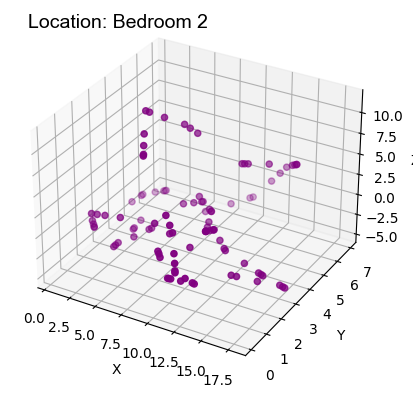

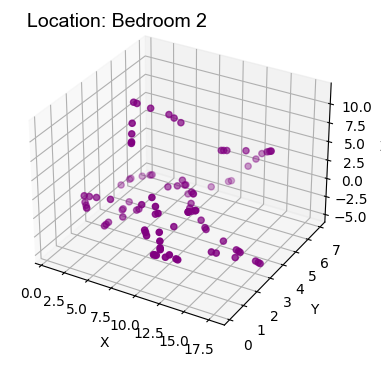

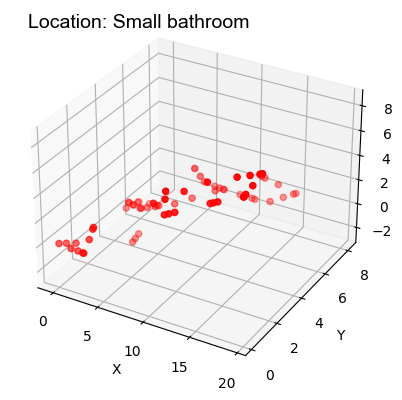

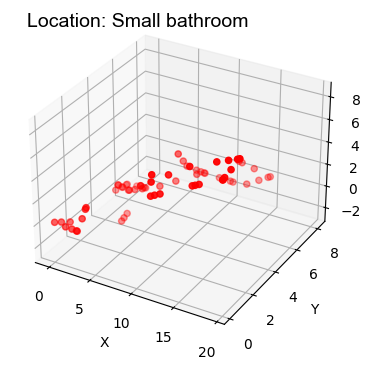

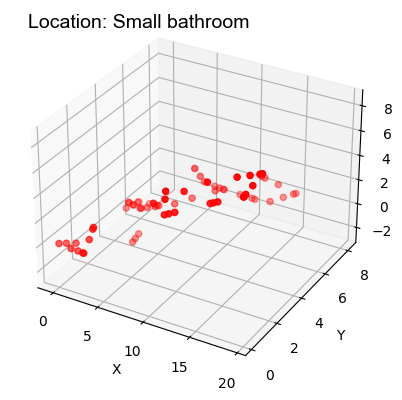

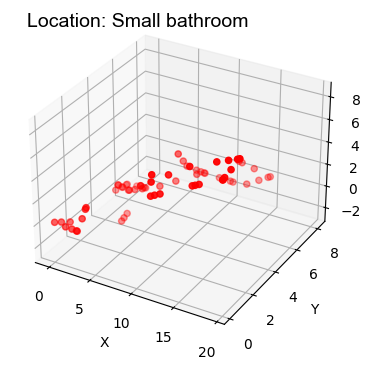

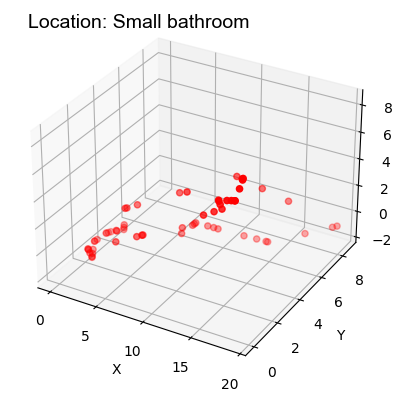

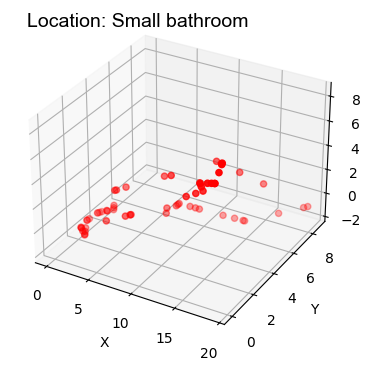

In [38]:
# Set the window size
window.geometry("800x600")  # Replace with your desired width and height
window.resizable(False, False)  # Disable window resizing

window.mainloop()